# Experiment

## Introduction

1. Run 100 random tests for each heuristic.
2. Measure memory usage (expanded nodes) and runtime.
3. Provide mean and standard deviation of memory usage and execution time for each heuristic.



In [60]:
import time

import pandas as pd
from tabulate import tabulate

from puzzle.board import Board
from puzzle.heuristics import manhattan_distance, hamming_distance
from puzzle.solver import Solver

## Measure Performance

Measures the performance of solving the 8-puzzle using a specified heuristic.

This function calculates the computation time and memory usage required to solve the puzzle using the given heuristic. It initializes the solver with the provided board and heuristic, executes the solver and then measures the time taken and memory consumed during the process.


In [61]:
def measure_performance(heuristic, board):
    """
    Parameters:
    heuristic (function): The heuristic function to be used (e.g., manhattan_distance, hamming_distance).
    board (Board): The current state of the 8-puzzle board.

    Returns:
    tuple: A tuple containing the computation time (in seconds) and memory usage (number of expanded nodes).
    """
    start_time = time.time()

    solver = Solver(board, heuristic)
    _, expanded_nodes = solver.solve()

    end_time = time.time()

    computation_time = end_time - start_time

    return computation_time, expanded_nodes

## Run Experiment

The `run_experiment` function performs the following tasks:

1. Initializes a dictionary to store the results for two heuristics: `manhattan_distance` and `hamming_tiles`.
2. Runs 100 iterations where:
   - A random solvable 8-puzzle board is generated.
   - The performance (computation time and memory usage) of solving the puzzle using the `manhattan_distance` heuristic is measured and recorded.
   - The performance (computation time and memory usage) of solving the puzzle using the `hamming_distance` heuristic is measured and recorded.
3. Returns the results as a dictionary containing the recorded times and memory usages for both heuristics.

In [62]:
def run_experiment():
    results = {
        'manhattan_distance': {'time': [], 'memory': []},
        'hamming_distance': {'time': [], 'memory': []}
    }

    for _ in range(100):
        board = Board.generate_random()

        time_md, memory_md = measure_performance(manhattan_distance, board)
        results['manhattan_distance']['time'].append(time_md)
        results['manhattan_distance']['memory'].append(memory_md)

        time_hd, memory_hd = measure_performance(hamming_distance, board)
        results['hamming_distance']['time'].append(time_hd)
        results['hamming_distance']['memory'].append(memory_hd)

    return results

In [63]:
def print_all_results(results):
    """
    Prints all results in a tabular format.
    :param results: dict containing the recorded times and memory usages for both heuristics.
    :return: None
    """
    data = {
        'Iteration': list(range(1, 101)),
        'Manhattan Time (s)': results['manhattan_distance']['time'],
        'Manhattan Memory (bytes)': results['manhattan_distance']['memory'],
        'Hamming Time (s)': results['hamming_distance']['time'],
        'Hamming Memory (bytes)': results['hamming_distance']['memory']
    }
    df = pd.DataFrame(data)
    print(df.to_string(index=False))

## Summarize Results

The `summarize_results` function calculates the average and standard deviation of computation time and memory usage for each heuristic over 100 iterations. It processes the results obtained from the run_experiment function and returns a summary dictionary.

In [64]:
import statistics


def summarize_results(results):
    """
    :param results: dict containing the recorded times and memory usages for both heuristics.
    :return: dict containing the average and standard deviation of computation time and memory usage for each heuristic.
    """
    summary = {
        'manhattan_distance': {
            'avg_time': sum(results['manhattan_distance']['time']) / 100,
            'std_time': statistics.stdev(results['manhattan_distance']['time']),
            'avg_memory': sum(results['manhattan_distance']['memory']) / 100,
            'std_memory': statistics.stdev(results['manhattan_distance']['memory'])
        },
        'hamming_distance': {
            'avg_time': sum(results['hamming_distance']['time']) / 100,
            'std_time': statistics.stdev(results['hamming_distance']['time']),
            'avg_memory': sum(results['hamming_distance']['memory']) / 100,
            'std_memory': statistics.stdev(results['hamming_distance']['memory'])
        }
    }
    return summary

## Display Results

The `display_results` function prints a summary table of the average computation time and memory usage for each heuristic. It uses the `tabulate` library to format the table in a grid layout.

In [65]:
def display_results(summary):
    """
    :param summary: dict containing the average and standard deviation of computation time and memory usage for each heuristic.
    :return: None
    """
    # Convert time to milliseconds and memory to kilobytes
    summary['manhattan_distance']['avg_time'] *= 1000  # seconds to milliseconds
    summary['hamming_distance']['avg_time'] *= 1000  # seconds to milliseconds
    summary['manhattan_distance']['std_time'] *= 1000  # seconds to milliseconds
    summary['hamming_distance']['std_time'] *= 1000  # seconds to milliseconds
    summary['manhattan_distance']['avg_memory'] /= 1024  # bytes to kilobytes
    summary['hamming_distance']['avg_memory'] /= 1024  # bytes to kilobytes
    summary['manhattan_distance']['std_memory'] /= 1024  # bytes to kilobytes
    summary['hamming_distance']['std_memory'] /= 1024  # bytes to kilobytes

    table = [
        ["Heuristic", "Avg. Computation Time (ms)", "Std. Computation Time (ms)", "Avg. Memory Usage (KB)",
         "Std. Memory Usage (KB)"],
        ["Hamming Distance", summary['hamming_distance']['avg_time'], summary['hamming_distance']['std_time'],
         summary['hamming_distance']['avg_memory'],
         summary['hamming_distance']['std_memory']],
        ["Manhattan Distance", summary['manhattan_distance']['avg_time'], summary['manhattan_distance']['std_time'],
         summary['manhattan_distance']['avg_memory'],
         summary['manhattan_distance']['std_memory']]
    ]
    print(tabulate(table, headers="firstrow", tablefmt="grid"))

## Visualize Results

The `visualize_results` function creates a visual comparison of the average computation time and memory usage for each heuristic. It uses the matplotlib library to generate a bar chart and a line plot on the same figure.

In [66]:
def visualize_results(summary):
    """
    Visualizes the average and standard deviation of computation time and memory usage for each heuristic.

    This function creates two side-by-side bar charts: one for the average and standard deviation of computation time and one for the average memory usage of solving the 8-puzzle problem using different heuristics.

    :param summary: dict
        A dictionary containing the average and standard deviation of computation time and memory usage for each heuristic.
        The dictionary should have the following structure:
        {
            'manhattan_distance': {
                'avg_time': float,  # Average computation time in milliseconds
                'std_time': float,  # Standard deviation of computation time in milliseconds
                'avg_memory': float  # Average memory usage in nodes
            },
            'hamming_distance': {
                'avg_time': float,  # Average computation time in milliseconds
                'std_time': float,  # Standard deviation of computation time in milliseconds
                'avg_memory': float  # Average memory usage in nodes
            }
        }
    :return: None
    """
    heuristics = ["Manhattan Distance", "Hamming Distance"]
    avg_times = [summary['manhattan_distance']['avg_time'], summary['hamming_distance']['avg_time']]
    std_times = [summary['manhattan_distance']['std_time'], summary['hamming_distance']['std_time']]
    avg_memory = [summary['manhattan_distance']['avg_memory'], summary['hamming_distance']['avg_memory']]
    std_memory = [summary['manhattan_distance']['std_memory'], summary['hamming_distance']['std_memory']]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plot for average and standard deviation of computation time
    ax1.set_title('Average and Std. Dev. Computation Time')
    ax1.set_xlabel('Heuristic')
    ax1.set_ylabel('Time (ms)')
    ax1.bar(heuristics, avg_times, yerr=std_times, color='tab:blue', alpha=0.6, capsize=5)

    # Plot for average memory usage
    ax2.set_title('Average and Std. Dev. Memory Usage')
    ax2.set_xlabel('Heuristic')
    ax2.set_ylabel('Memory Usage (KB)')
    ax2.bar(heuristics, avg_memory, yerr=std_memory, color='tab:red', alpha=0.6, capsize=5)

    fig.tight_layout()
    plt.show()

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def visualize_results_with_distribution(summary):
    """
    Visualizes the average and standard deviation of computation time and memory usage for each heuristic,
    along with separate graphs for the memory distributions of Manhattan and Hamming distances.

    :param summary: dict
        A dictionary containing the average and standard deviation of computation time and memory usage for each heuristic.
    :return: None
    """
    heuristics = ["Manhattan Distance", "Hamming Distance"]
    avg_times = [summary['manhattan_distance']['avg_time'], summary['hamming_distance']['avg_time']]
    std_times = [summary['manhattan_distance']['std_time'], summary['hamming_distance']['std_time']]
    avg_memory = [summary['manhattan_distance']['avg_memory'], summary['hamming_distance']['avg_memory']]
    std_memory = [summary['manhattan_distance']['std_memory'], summary['hamming_distance']['std_memory']]

    # Create the figure
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))

    # Bar Chart: Average and Std. Dev. Computation Time
    axs[0, 0].set_title('Average and Std. Dev. Computation Time')
    axs[0, 0].set_xlabel('Heuristic')
    axs[0, 0].set_ylabel('Time (ms)')
    axs[0, 0].bar(heuristics, avg_times, yerr=std_times, color='tab:blue', alpha=0.6, capsize=5)

    # Bar Chart: Average Memory Usage
    axs[0, 1].set_title('Average and Std. Dev. Memory Usage')
    axs[0, 1].set_xlabel('Heuristic')
    axs[0, 1].set_ylabel('Memory Usage (KB)')
    axs[0, 1].bar(heuristics, avg_memory, yerr=std_memory, color='tab:red', alpha=0.6, capsize=5)

    # Bell Curve: Manhattan Distance Computation Time
    x_time = np.linspace(-4, 4, 500)
    y_time = norm.pdf(x_time, 0, 1)
    axs[1, 0].set_title('Time Distribution: Manhattan Distance')
    axs[1, 0].plot(x_time * std_times[0] + avg_times[0], y_time, color='blue')
    axs[1, 0].fill_between(x_time * std_times[0] + avg_times[0], y_time, alpha=0.2, color='blue')
    axs[1, 0].set_xlabel('Time (ms)')
    axs[1, 0].set_ylabel('Density')

    # Bell Curve: Hamming Distance Computation Time
    axs[1, 1].set_title('Time Distribution: Hamming Distance')
    axs[1, 1].plot(x_time * std_times[1] + avg_times[1], y_time, color='red')
    axs[1, 1].fill_between(x_time * std_times[1] + avg_times[1], y_time, alpha=0.2, color='red')
    axs[1, 1].set_xlabel('Time (ms)')
    axs[1, 1].set_ylabel('Density')

    # Adjust layout for the bar and time distribution plots
    fig.tight_layout()
    plt.show()

    # Memory Bell Curve: Manhattan
    x_memory = np.linspace(-4, 4, 500)
    y_memory = norm.pdf(x_memory, 0, 1)
    x_manhattan_memory = x_memory * std_memory[0] + avg_memory[0]

    plt.figure(figsize=(8, 6))
    plt.title('Memory Distribution: Manhattan Distance')
    plt.plot(x_manhattan_memory, y_memory, color='blue', label='Manhattan')
    plt.fill_between(x_manhattan_memory, y_memory, alpha=0.2, color='blue')
    plt.xlabel('Memory Usage (KB)')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

    # Memory Bell Curve: Hamming
    x_hamming_memory = x_memory * std_memory[1] + avg_memory[1]

    plt.figure(figsize=(8, 6))
    plt.title('Memory Distribution: Hamming Distance')
    plt.plot(x_hamming_memory, y_memory, color='red', linestyle='--', label='Hamming')
    plt.fill_between(x_hamming_memory, y_memory, alpha=0.2, color='red')
    plt.xlabel('Memory Usage (KB)')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

In [ ]:
results = run_experiment()

In [53]:
summary = summarize_results(results)

In [54]:
print_all_results(results)

 Iteration  Manhattan Time (s)  Manhattan Memory (bytes)  Hamming Time (s)  Hamming Memory (bytes)
         1            0.004539                       541          0.119968                    8887
         2            0.006049                       746          0.172388                   11195
         3            0.011320                      1342          0.170201                   13882
         4            0.042665                       909          0.241803                   18830
         5            0.001109                       128          0.008442                     982
         6            0.003095                       381          0.081227                    5197
         7            0.000572                        71          0.001880                     245
         8            0.024312                      3089          0.981298                   71306
         9            0.003356                       412          0.149194                   11797
        10

In [55]:
display_results(summary)

+--------------------+------------------------------+------------------------------+--------------------------+--------------------------+
| Heuristic          |   Avg. Computation Time (ms) |   Std. Computation Time (ms) |   Avg. Memory Usage (KB) |   Std. Memory Usage (KB) |
+====================+==============================+==============================+==========================+==========================+
| Hamming Distance   |                     185.882  |                     237.17   |                13.7871   |                 16.3172  |
+--------------------+------------------------------+------------------------------+--------------------------+--------------------------+
| Manhattan Distance |                      10.8308 |                      14.3729 |                 0.959551 |                  1.06075 |
+--------------------+------------------------------+------------------------------+--------------------------+--------------------------+


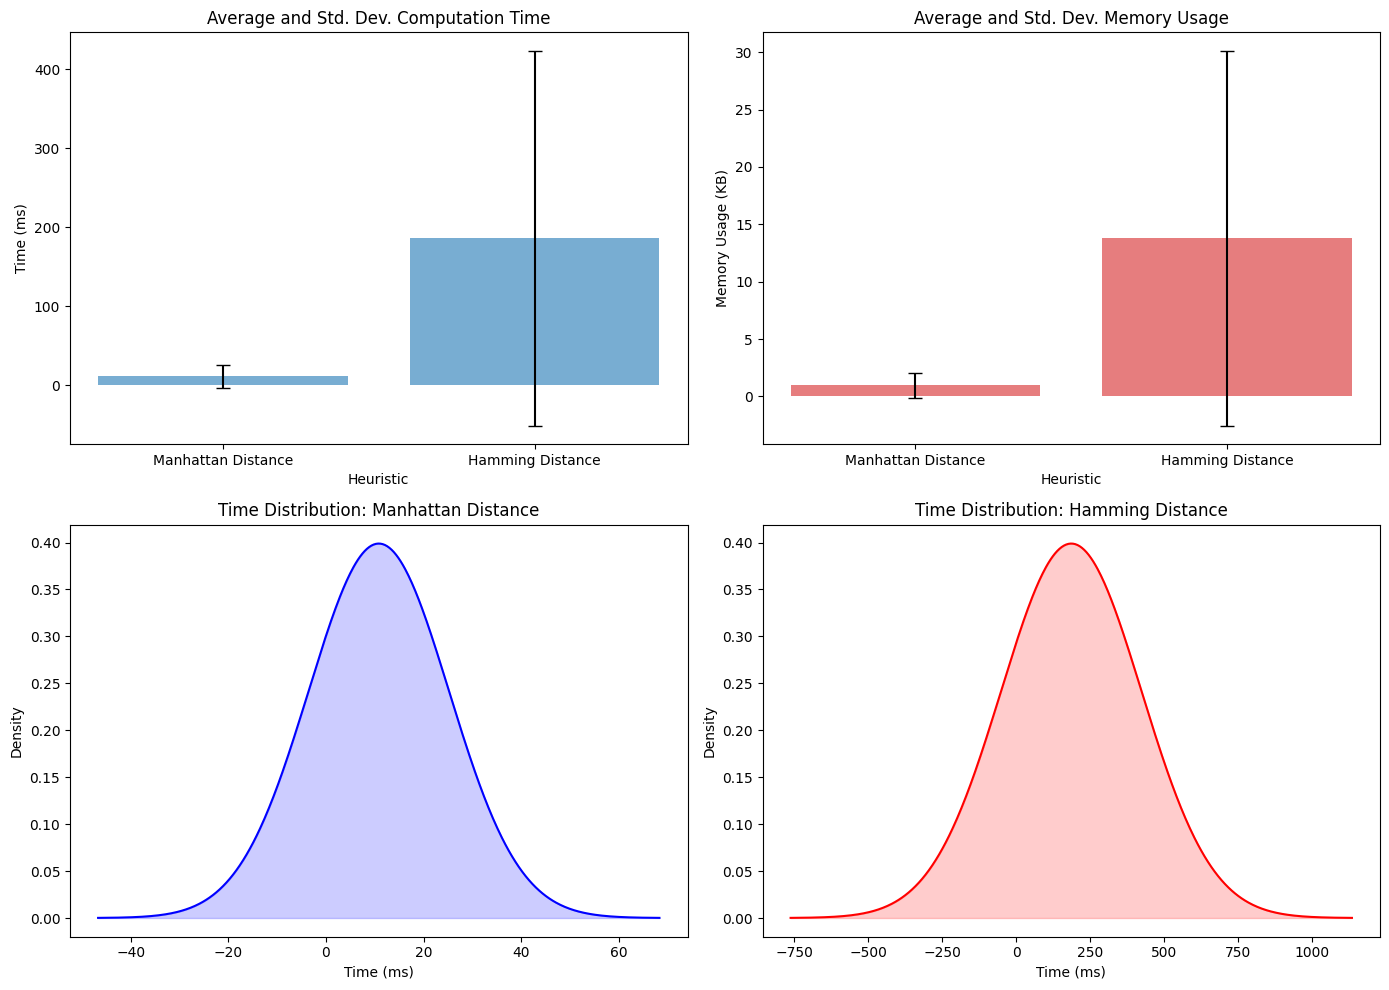

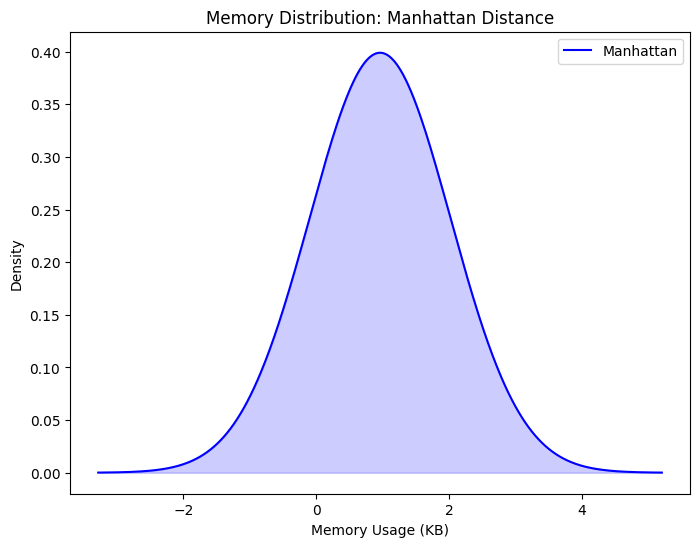

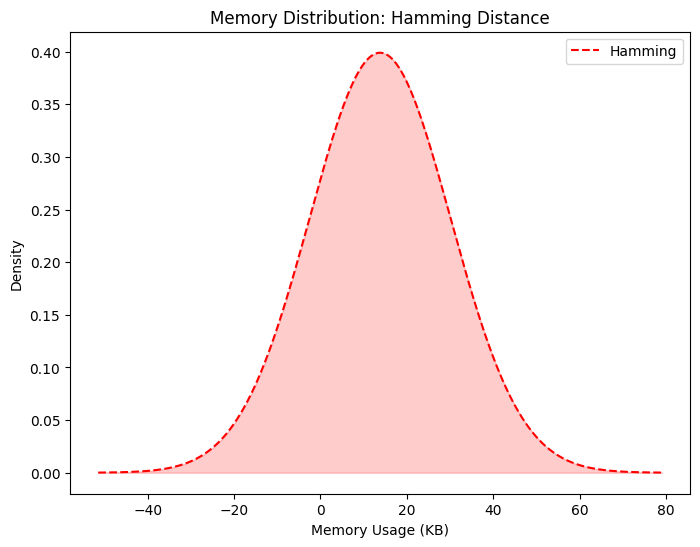

In [59]:
visualize_results_with_distribution(summary)